# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

# Draw the inferences from the clusters obtained.

Data Description:
 
**The file EastWestAirlinescontains information on passengers**
**who belong to an airline’s frequent flier program. For each**
**passenger the data include information on their mileage**
**history and on different ways they accrued or spent miles in** 
**the last year. The goal is to try to identify clusters of** 
**passengers that have similar characteristics for the purpose** 
**of targeting different segments for different types of mileage offers** 

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [247]:
#Load the dataset
#Print top 10 rows
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('/content/EastWestAirlines.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [55]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [60]:
df.shape

(3999, 12)

In [248]:
# Column rename to make shorter
df.rename(columns={'ID#':'ID', 'Award?':'Award','Qual_miles':'q_miles', 'cc1_miles':'cc1',
                   'cc2_miles':'cc2','cc3_miles':'cc3','Bonus_miles':'b_miles', 'Bonus_trans':'b_trans',
                   'Flight_miles_12mo':'f_miles12','Flight_trans_12':'f_trans12','Days_since_enroll':'day_se'}, inplace=True)

#Set ID as Index Column
df.set_index('ID',inplace=True)
df

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [62]:
#check dtypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Balance    3999 non-null   int64
 1   q_miles    3999 non-null   int64
 2   cc1        3999 non-null   int64
 3   cc2        3999 non-null   int64
 4   cc3        3999 non-null   int64
 5   b_miles    3999 non-null   int64
 6   b_trans    3999 non-null   int64
 7   f_miles12  3999 non-null   int64
 8   f_trans12  3999 non-null   int64
 9   day_se     3999 non-null   int64
 10  Award      3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


# **EDA**

In [63]:
#check for missing values 
df.isna().sum()

Balance      0
q_miles      0
cc1          0
cc2          0
cc3          0
b_miles      0
b_trans      0
f_miles12    0
f_trans12    0
day_se       0
Award        0
dtype: int64

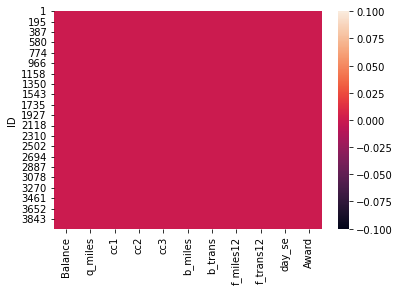

In [64]:
#to genrate heat map for missing values
import seaborn as sns
cols = df.columns
sns.heatmap(df[cols].isnull())

We can conclude no missing values in our data

In [65]:
#check for duplicate values
df[df.duplicated()].shape

(1, 11)

In [66]:
#print duplicate vales
df[df.duplicated()]

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [249]:
#drop the duplicate values
df1=df.drop_duplicates()

In [215]:
df1.shape

(3998, 11)

There was one duplicate value in our data. We have dropped that row.

In [71]:
df1.columns

Index(['Balance', 'q_miles', 'cc1', 'cc2', 'cc3', 'b_miles', 'b_trans',
       'f_miles12', 'f_trans12', 'day_se', 'Award'],
      dtype='object')

In [76]:
#print unique values of categorical columns
print(df1.Award.value_counts(), '\n', df1.cc1.value_counts(), '\n', df1.cc2.value_counts(), 
      '\n',df1.cc3.value_counts())

0    2517
1    1481
Name: Award, dtype: int64 
 1    2288
3     613
4     525
5     288
2     284
Name: cc1, dtype: int64 
 1    3955
2      28
3      15
Name: cc2, dtype: int64 
 1    3980
4       6
5       5
3       4
2       3
Name: cc3, dtype: int64


In [77]:
#correct the dtypes of columns Award, cc1, cc2,cc3,cc4
df1.dtypes

Balance      int64
q_miles      int64
cc1          int64
cc2          int64
cc3          int64
b_miles      int64
b_trans      int64
f_miles12    int64
f_trans12    int64
day_se       int64
Award        int64
dtype: object

In [78]:
df1['Award'] = df1['Award'].astype('category')
df1['cc1'] = df1['cc1'].astype('category')
df1['cc2'] = df1['cc2'].astype('category')
df1['cc3'] = df1['cc3'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [79]:
df1.dtypes

Balance         int64
q_miles         int64
cc1          category
cc2          category
cc3          category
b_miles         int64
b_trans         int64
f_miles12       int64
f_trans12       int64
day_se          int64
Award        category
dtype: object

In [80]:
df1.describe()

,Balance,q_miles,b_miles,b_trans,f_miles12,f_trans12,day_se
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,17149.134567,11.604802,460.170835,1.373937,4119.190095
std,1.007817e+05,773.757220,24152.465996,9.603258,1400.365407,3.793585,2065.007629
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.853425e+04,0.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000
50%,4.313800e+04,0.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000
75%,9.240500e+04,0.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000
max,1.704838e+06,11148.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000


1    2288
3     613
4     525
5     288
2     284
Name: cc1, dtype: int64


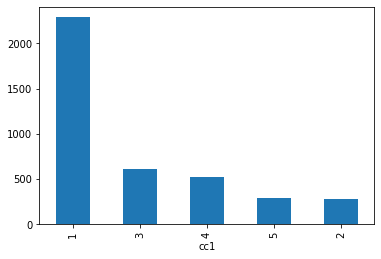

In [84]:
#Univariate Analysis
#first we will do for categorical
df1['cc1'].value_counts().plot.bar()
plt.xlabel('cc1')
print(df1['cc1'].value_counts())

1    3955
2      28
3      15
Name: cc2, dtype: int64


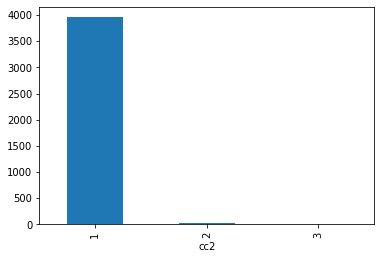

In [85]:
df1['cc2'].value_counts().plot.bar()
plt.xlabel('cc2')
print(df1['cc2'].value_counts())

1    3980
4       6
5       5
3       4
2       3
Name: cc3, dtype: int64


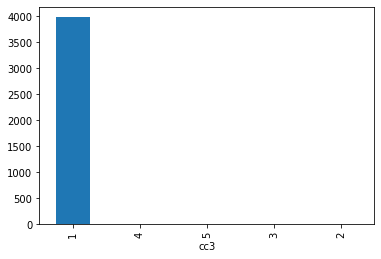

In [86]:
df1['cc3'].value_counts().plot.bar()
plt.xlabel('cc3')
print(df1['cc3'].value_counts())

0    2517
1    1481
Name: Award, dtype: int64


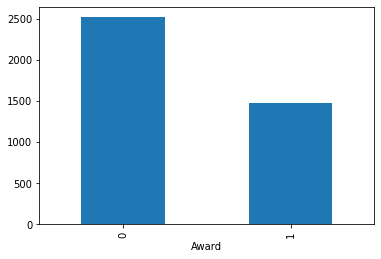

In [87]:
df1['Award'].value_counts().plot.bar()
plt.xlabel('Award')
print(df1['Award'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of miles eligible for Award travel')

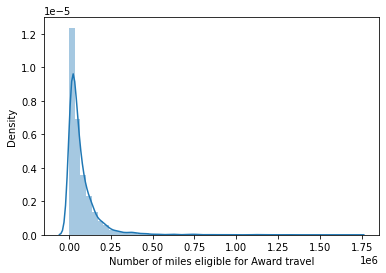

In [93]:
sns.distplot(df1.Balance)
plt.xlabel('Number of miles eligible for Award travel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of miles counted as qualifying for Topflight status')

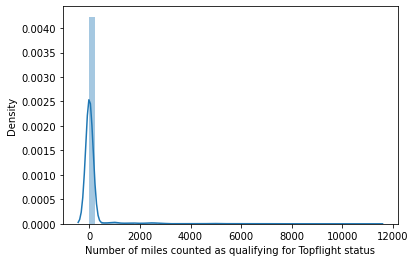

In [92]:
sns.distplot(df1.q_miles)
plt.xlabel('Number of miles counted as qualifying for Topflight status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of miles earned from non-flight bonus transactions in the past 12 months')

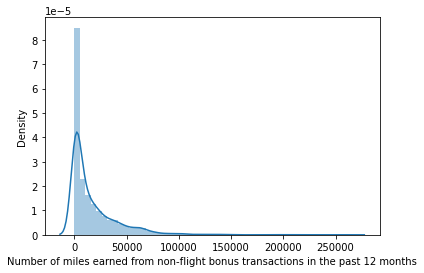

In [94]:
sns.distplot(df1.b_miles)
plt.xlabel('Number of miles earned from non-flight bonus transactions in the past 12 months')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of non-flight bonus transactions in the past 12 months')

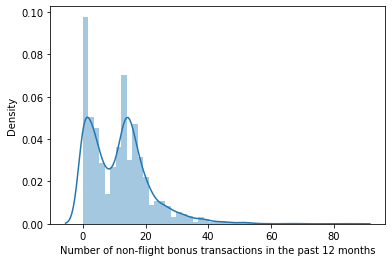

In [95]:
sns.distplot(df1.b_trans)
plt.xlabel('Number of non-flight bonus transactions in the past 12 months')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of flight miles in the past 12 months')

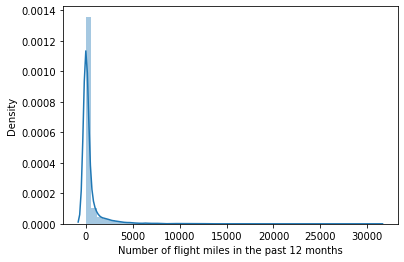

In [96]:
sns.distplot(df1.f_miles12)
plt.xlabel('Number of flight miles in the past 12 months')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of flight transactions in the past 12 months')

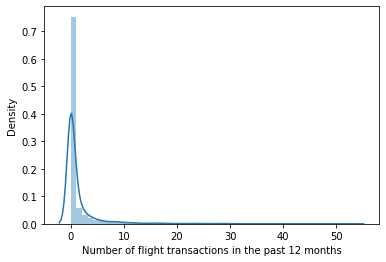

In [97]:
sns.distplot(df1.f_trans12)
plt.xlabel('Number of flight transactions in the past 12 months')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Number of days since last enrolled in flier program')

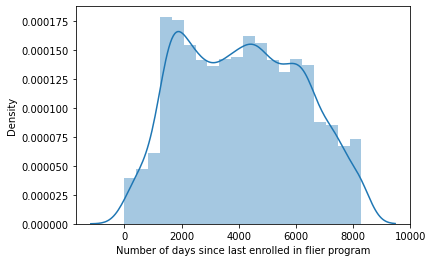

In [99]:
sns.distplot(df1.day_se)
plt.xlabel('Number of days since last enrolled in flier program')

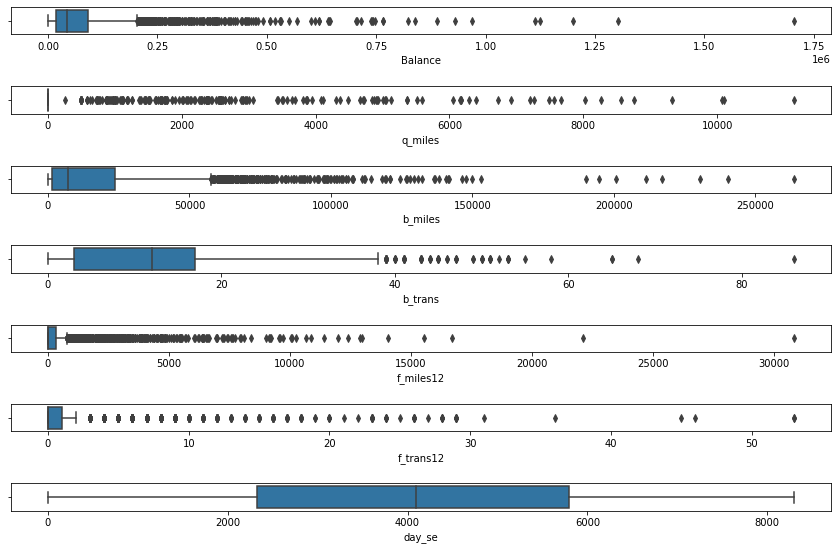

In [100]:
#Outlier Detection
fig, axes=plt.subplots(7,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=df1,ax=axes[0])
sns.boxplot(x='q_miles',data=df1,ax=axes[1])
sns.boxplot(x='b_miles',data=df1,ax=axes[2])
sns.boxplot(x='b_trans',data=df1,ax=axes[3])
sns.boxplot(x='f_miles12',data=df1,ax=axes[4])
sns.boxplot(x='f_trans12',data=df1,ax=axes[5])
sns.boxplot(x='day_se',data=df1,ax=axes[6])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

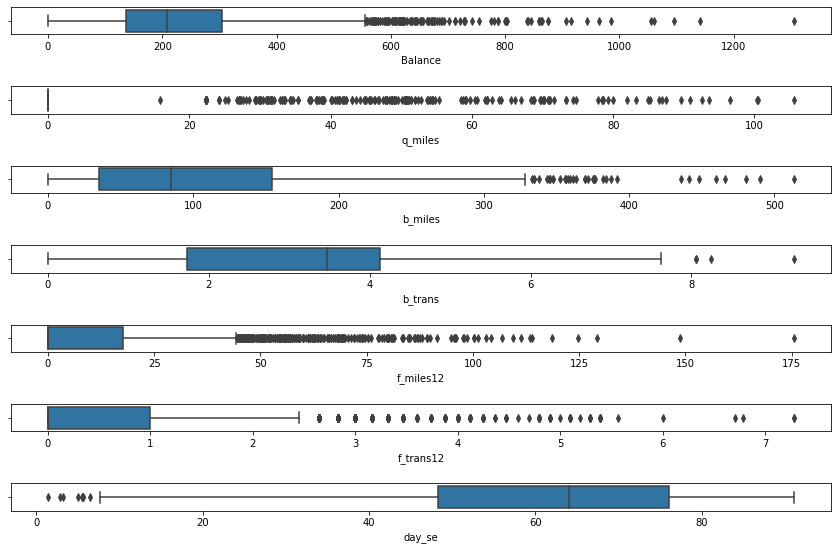

In [107]:
# Apply sqrt tansformation

fig, axes=plt.subplots(7,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(np.sqrt(df1.Balance),ax=axes[0])
sns.boxplot(np.sqrt(df1.q_miles),ax=axes[1])
sns.boxplot(np.sqrt(df1.b_miles),ax=axes[2])
sns.boxplot(np.sqrt(df1.b_trans),ax=axes[3])
sns.boxplot(np.sqrt(df1.f_miles12),ax=axes[4])
sns.boxplot(np.sqrt(df1.f_trans12),ax=axes[5])
sns.boxplot(np.sqrt(df1.day_se),ax=axes[6])
plt.tight_layout(pad=2.0)

This is a noisy data so DBSCAN would be more effective clustering technique.

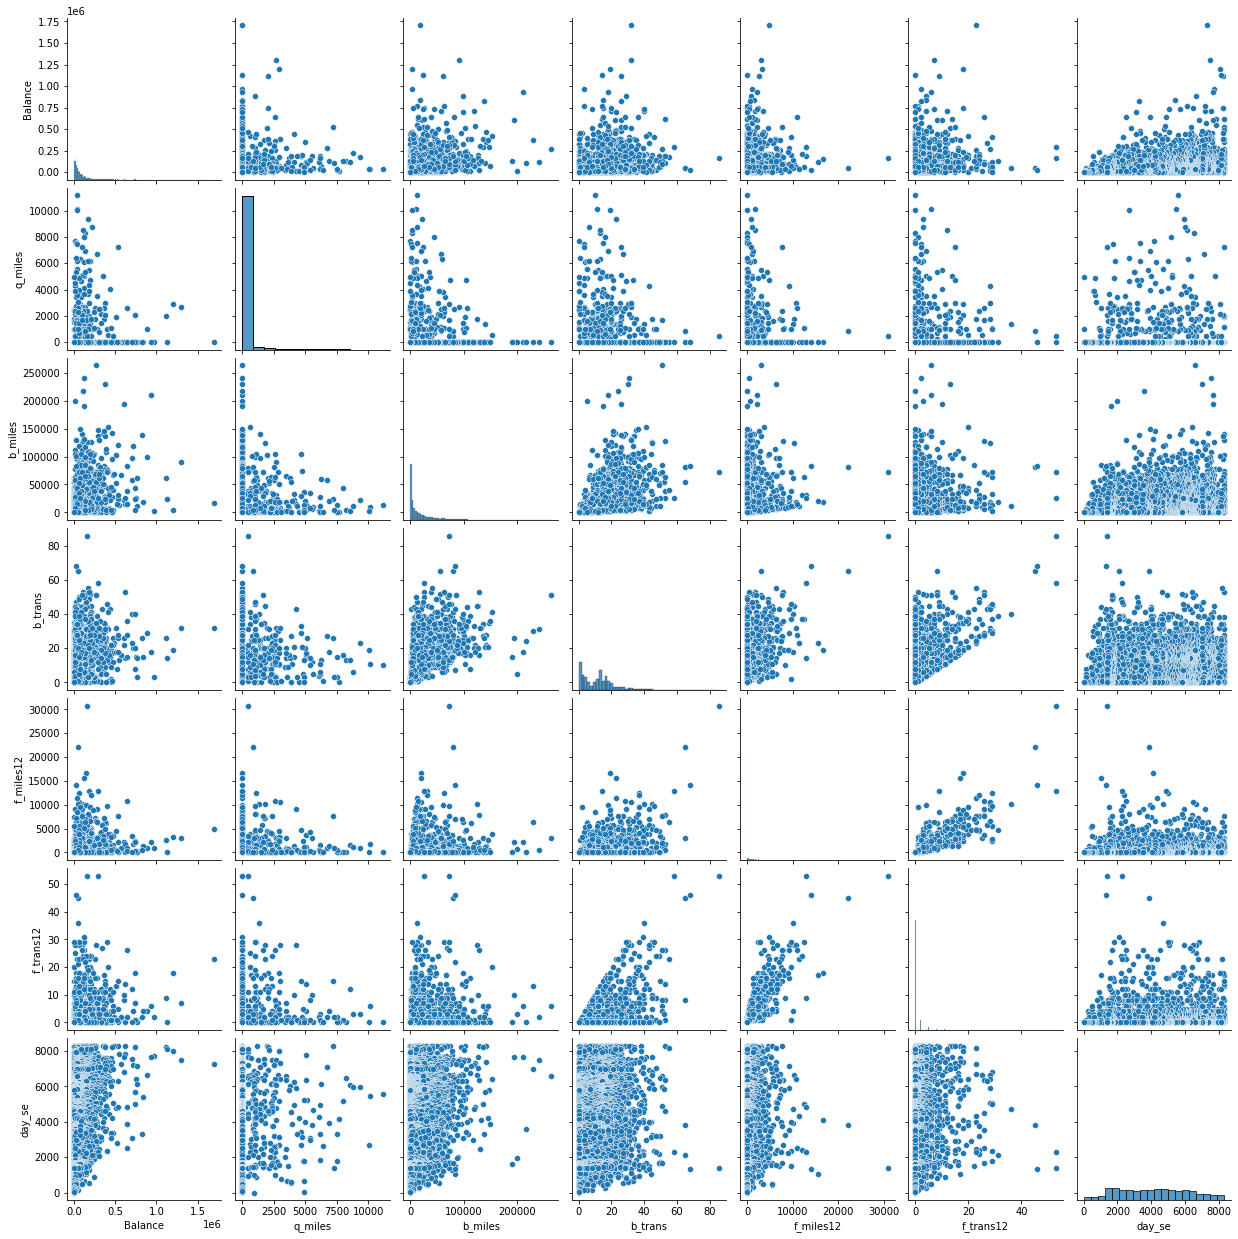

In [117]:
sns.pairplot(df1)

In [118]:
df1.corr()

,Balance,q_miles,b_miles,b_trans,f_miles12,f_trans12,day_se
Balance,1.000000,0.108696,0.403410,0.324797,0.217509,0.255656,0.262975
q_miles,0.108696,1.000000,0.030990,0.050678,0.126761,0.143990,0.017259
b_miles,0.403410,0.030990,1.000000,0.603114,0.183492,0.185211,0.210232
b_trans,0.324797,0.050678,0.603114,1.000000,0.377190,0.432341,0.160953
f_miles12,0.217509,0.126761,0.183492,0.377190,1.000000,0.869189,0.037178
f_trans12,0.255656,0.143990,0.185211,0.432341,0.869189,1.000000,0.059161
day_se,0.262975,0.017259,0.210232,0.160953,0.037178,0.059161,1.000000


There is not so much of colinearity in our data except, for positve corelation between b_miles - b_trans and f_miles12 and f_trans12, which is obvious as the number of transaction would increase the miles rewarded.

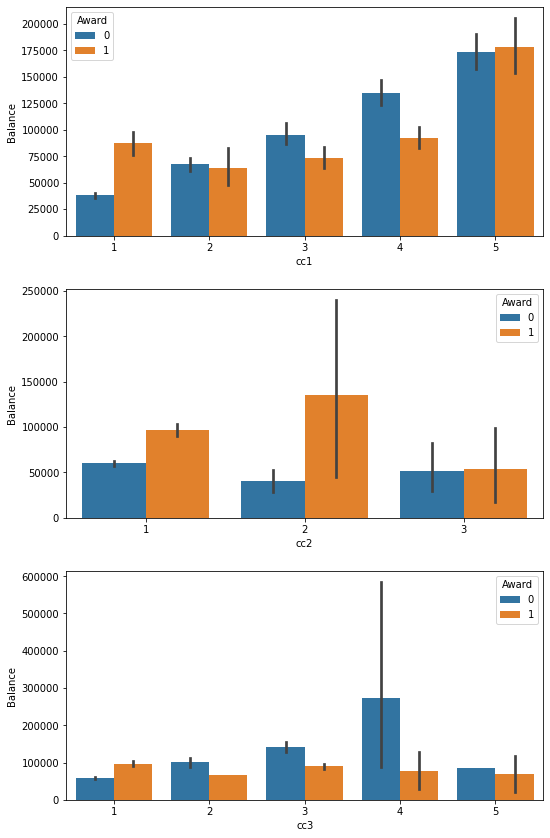

In [146]:
#Multivariate Analysis
fig, axes=plt.subplots(3,1,figsize=(8,12),sharex=False,sharey=False)
sns.barplot(y= 'Balance',x= 'cc1', hue='Award', data=df1, ax=axes[0])
sns.barplot(y= 'Balance',x ='cc2', hue='Award', data=df1, ax=axes[1])
sns.barplot(y= 'Balance',x= 'cc3', hue='Award', data=df1, ax=axes[2])
plt.tight_layout(pad=2.0)

- cx using cc3 have larger balance miles to qualify for Award Travel.

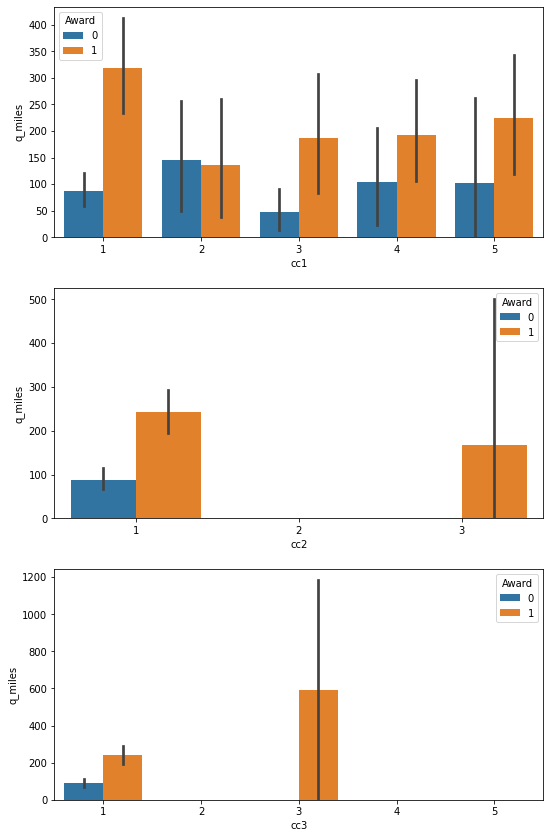

In [147]:
fig, axes=plt.subplots(3,1,figsize=(8,12),sharex=False,sharey=False)
sns.barplot(y= 'q_miles',x= 'cc1', hue='Award', data=df1, ax=axes[0])
sns.barplot(y= 'q_miles',x ='cc2', hue='Award', data=df1, ax=axes[1])
sns.barplot(y= 'q_miles',x= 'cc3', hue='Award', data=df1, ax=axes[2])
plt.tight_layout(pad=2.0)

- Not much can be infered from these plots

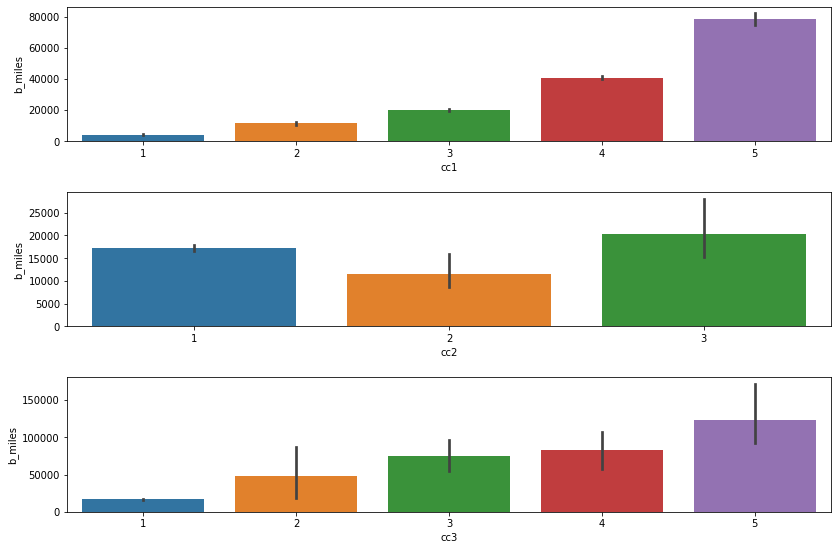

In [136]:
fig, axes=plt.subplots(3,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(x='cc1', y='b_miles', data=df1, ax=axes[0])
sns.barplot(x='cc2', y='b_miles', data=df1, ax=axes[1])
sns.barplot(x='cc3', y='b_miles', data=df1, ax=axes[2])
plt.tight_layout(pad=2.0)

- b_miles earned in cc3 is the highest, then ranks cc1 and at last cc2.

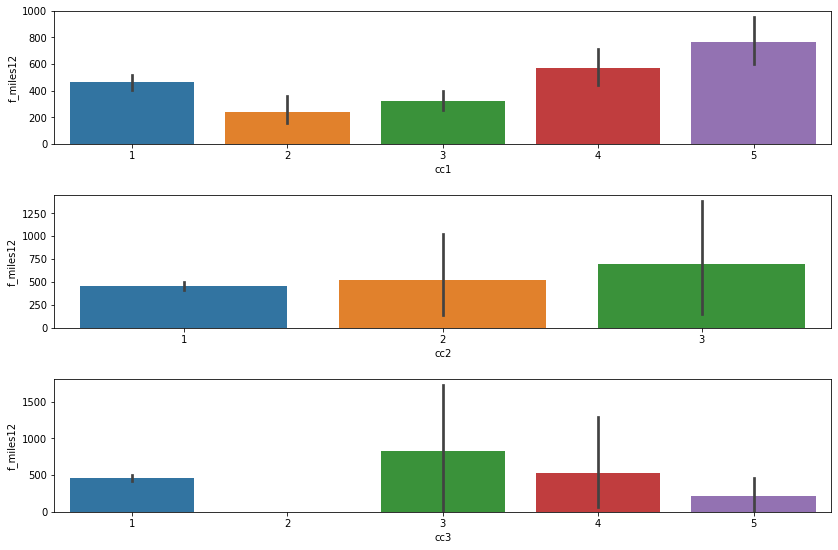

In [137]:
fig, axes=plt.subplots(3,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(x='cc1', y='f_miles12', data=df1, ax=axes[0])
sns.barplot(x='cc2', y='f_miles12', data=df1, ax=axes[1])
sns.barplot(x='cc3', y='f_miles12', data=df1, ax=axes[2])
plt.tight_layout(pad=2.0)

- Not much can be concluded from these plots. Distribution is not order.

- But from above 6 plots we can say miles earned in cc2 are way less than cc1 and cc3.

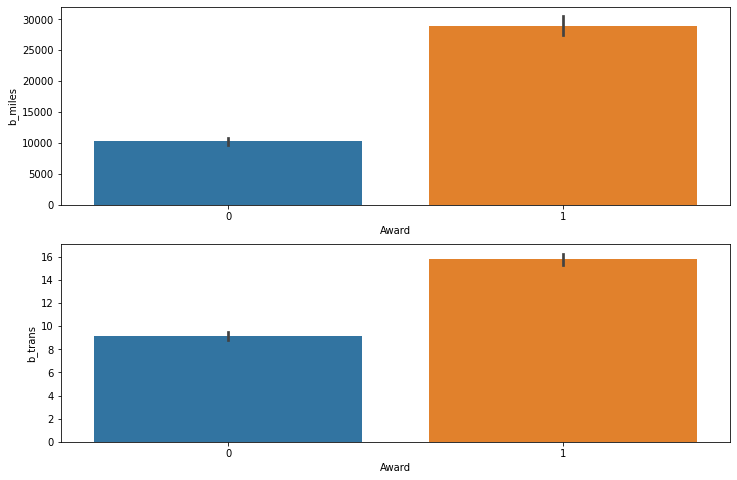

In [128]:
fig, axes=plt.subplots(2,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(y='b_miles', x='Award', data=df1, ax=axes[0])
sns.barplot(y= 'b_trans', x='Award', data=df1, ax=axes[1])

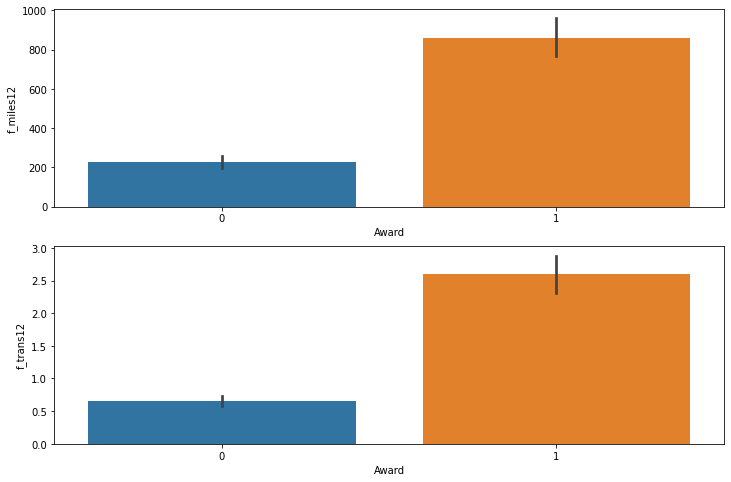

In [127]:
fig, axes=plt.subplots(2,1,figsize=(12,8),sharex=False,sharey=False)
sns.barplot(y='f_miles12', x='Award', data=df1, ax=axes[0])
sns.barplot(y= 'f_trans12', x='Award', data=df1, ax=axes[1])

From the above 4 plots we can strenghten our point that f-miles12 and f-trans12 are positively coralated and same for b-miles and b-trans.

It is a trend, flight transactions done are comparitively lower than non-flight bonus transactions and hence miles achived by flight transactions is lower than non-flight bonus transactions. 

In [149]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(3998, 11)

In [150]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(3998, 11)

# **Heirarchical Clustering**

**Single**

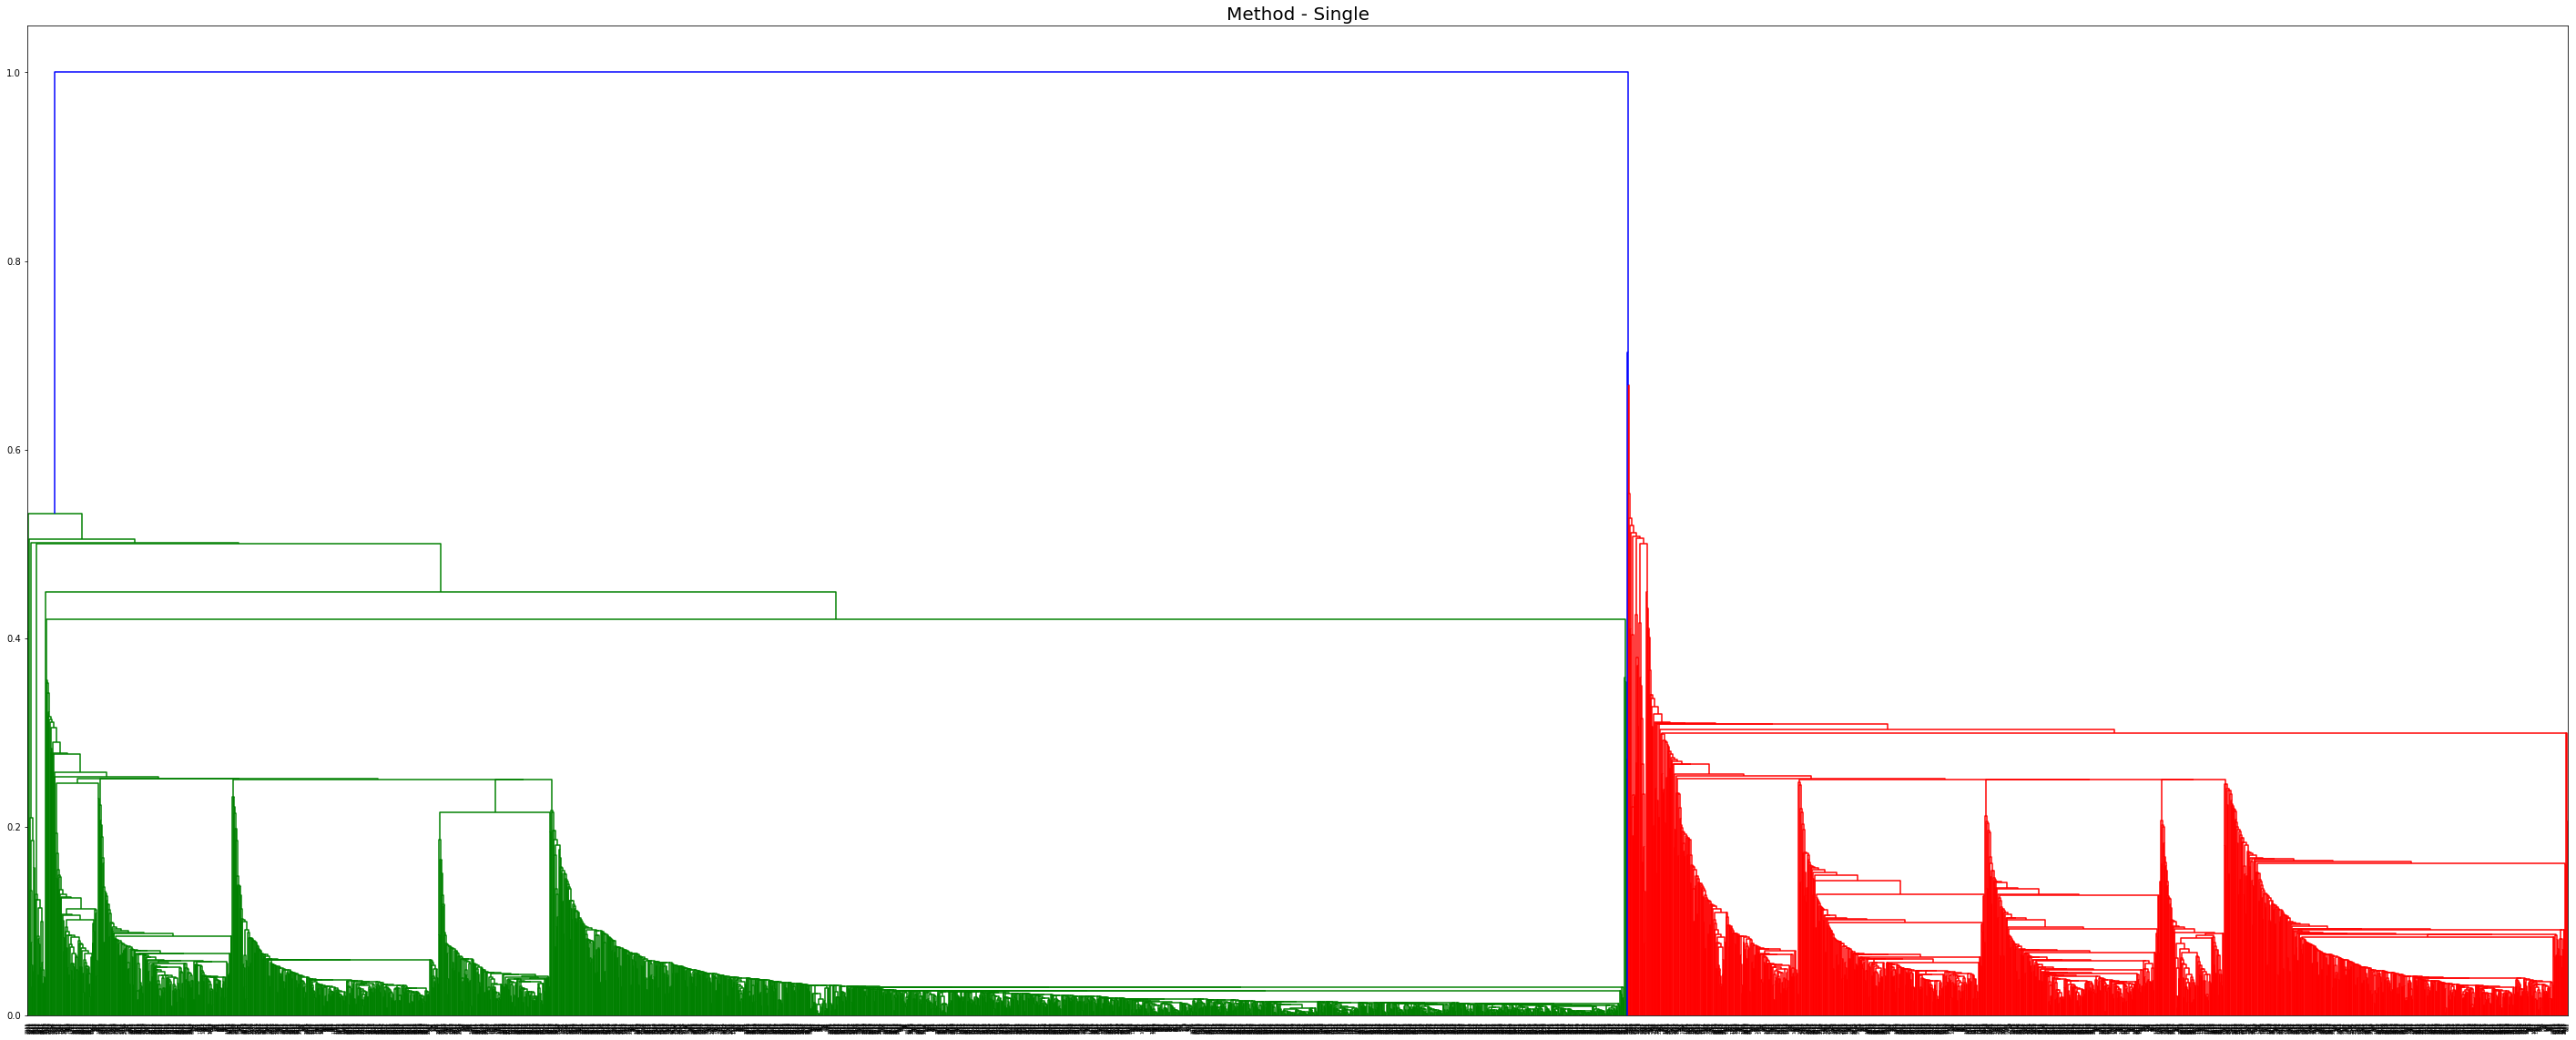

In [153]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single", fontsize=20)
plt.show()

In [186]:
#creating clusters method - single
hc_s = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage= 'single')

In [187]:
y_hc = hc_s.fit_predict(minmax_df)
y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [188]:
df1['h_clusterid'] = y_hc
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [189]:
df1.h_clusterid.value_counts()

2    2515
0    1478
1       2
4       1
3       1
5       1
Name: h_clusterid, dtype: int64

In [190]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,q_miles,b_miles,b_trans,f_miles12,f_trans12,day_se
,,mean,mean,mean,mean,mean,mean,mean
0,0,97125.211773,240.345737,28703.769959,15.742219,837.970230,2.566982,4628.257104
1,1,72811.000000,0.000000,65932.500000,10.500000,0.000000,0.000000,2204.000000
2,2,59820.881909,87.706958,10187.457654,9.145527,226.562227,0.653280,3822.821869
3,3,8557.000000,0.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000
4,4,15835.000000,0.000000,112171.000000,16.000000,0.000000,0.000000,5825.000000
5,5,160114.000000,500.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000


**Average**

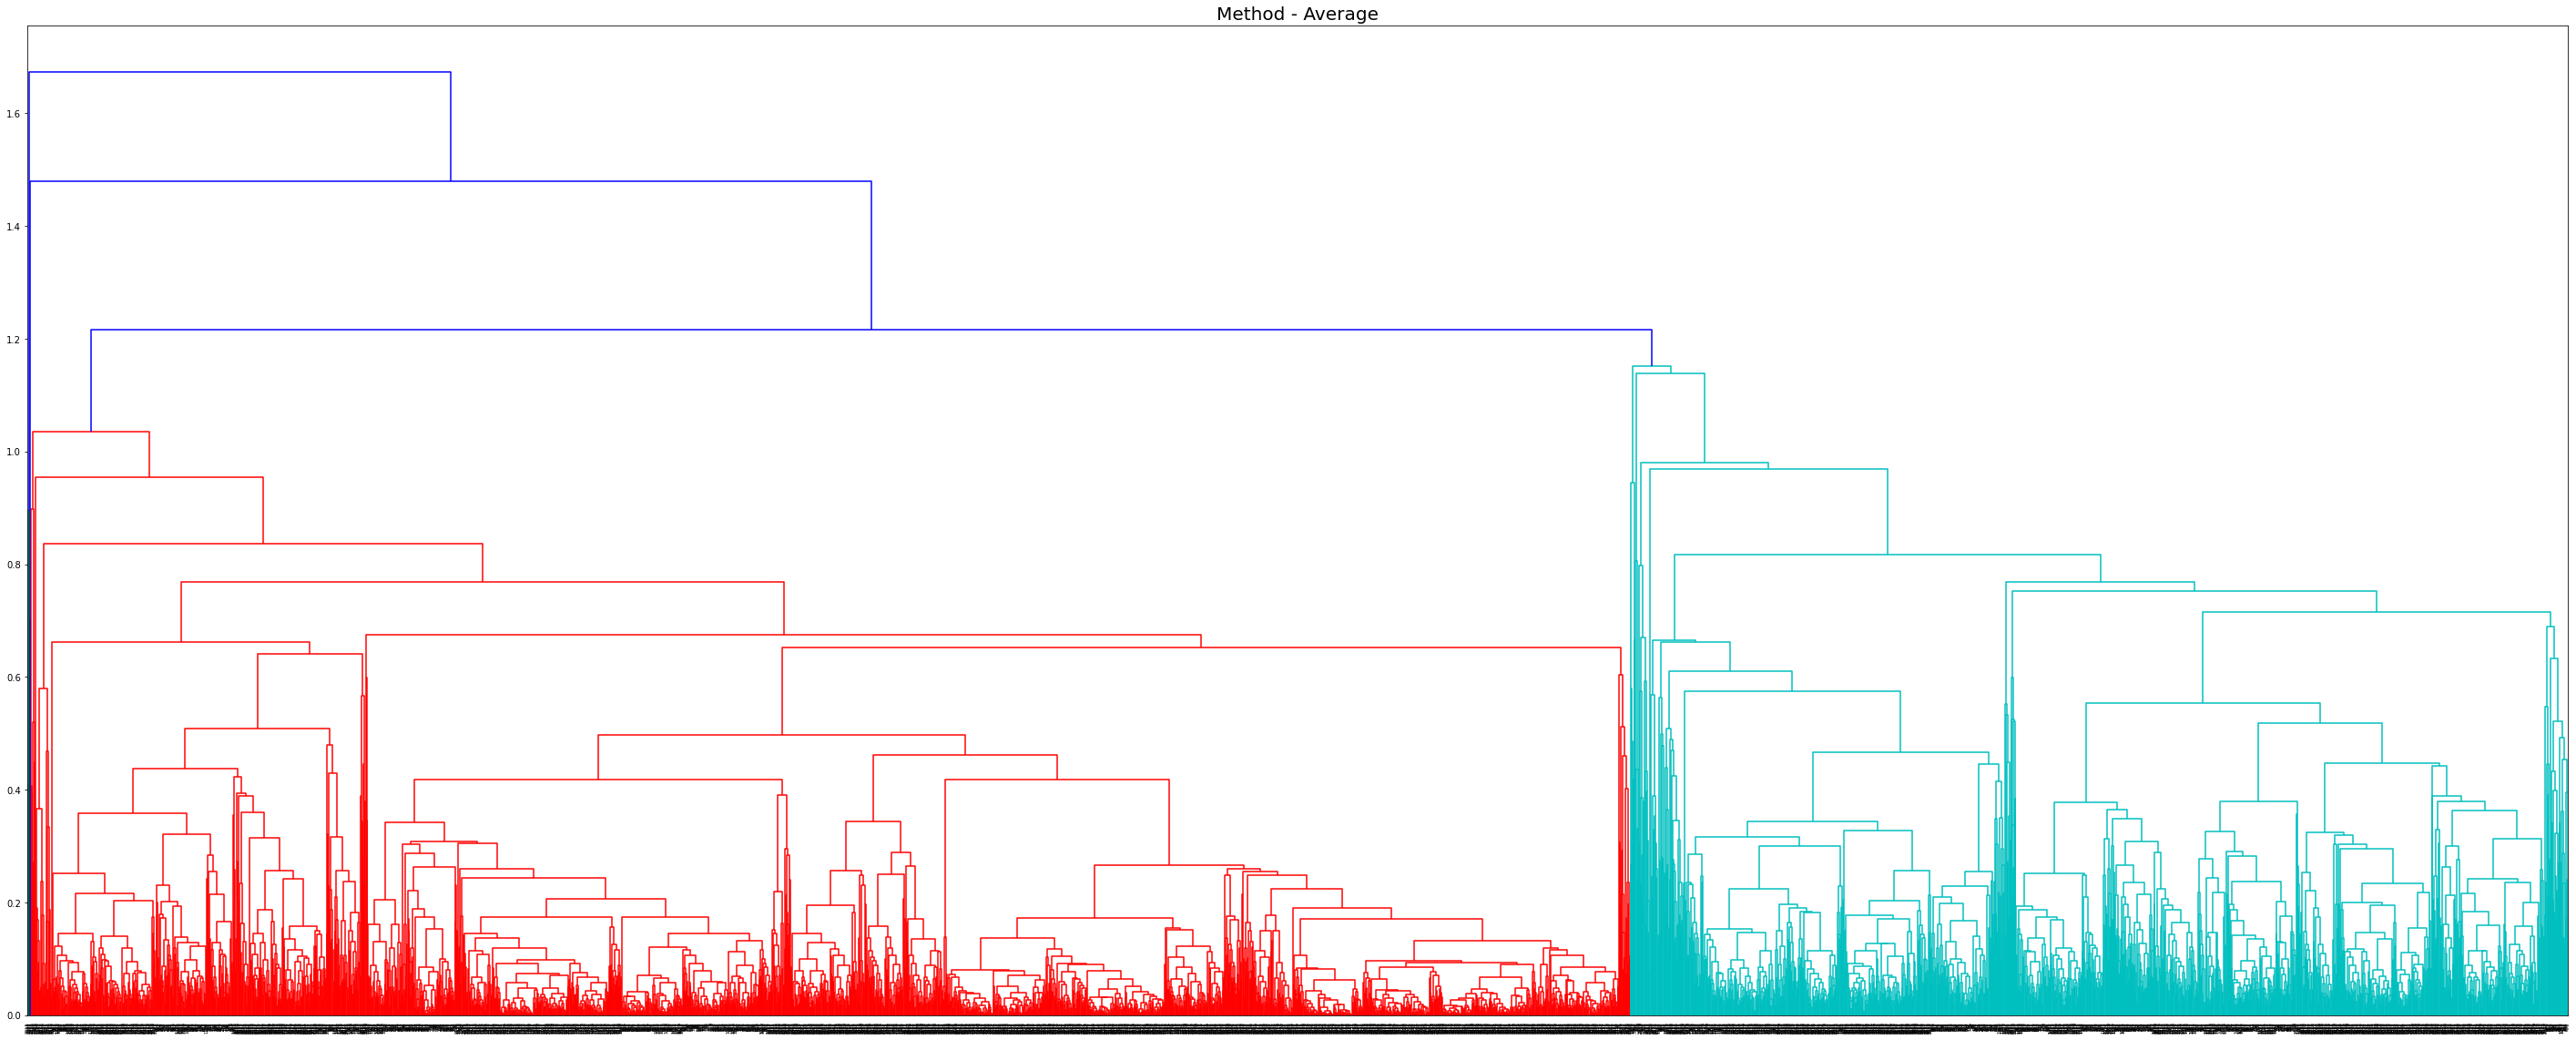

In [154]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average", fontsize=20)
plt.show()

In [216]:
#creating clusters method - average
hc_a = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage= 'average')

In [217]:
y_hc_a = hc_a.fit_predict(minmax_df)
y_hc_a

array([1, 1, 1, ..., 0, 1, 1])

In [219]:
df2=df1.copy() 
df2['h_clusterid'] = y_hc_a
df2

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [221]:
df2.h_clusterid.value_counts()

1    2510
0    1462
4       8
2       7
6       6
3       4
5       1
Name: h_clusterid, dtype: int64

In [222]:
df2.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.470821e+04,241.560192,2.647059,1.015732,1.000684,27548.586183,15.493844,797.608071,2.446648,4620.122435,1.0
1,1,5.941703e+04,87.881673,1.701992,1.013944,1.000797,10066.370120,9.100797,225.898008,0.651394,3820.964143,0.0
2,2,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0
3,3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
4,4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0
5,5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
6,6,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0


**Complete**

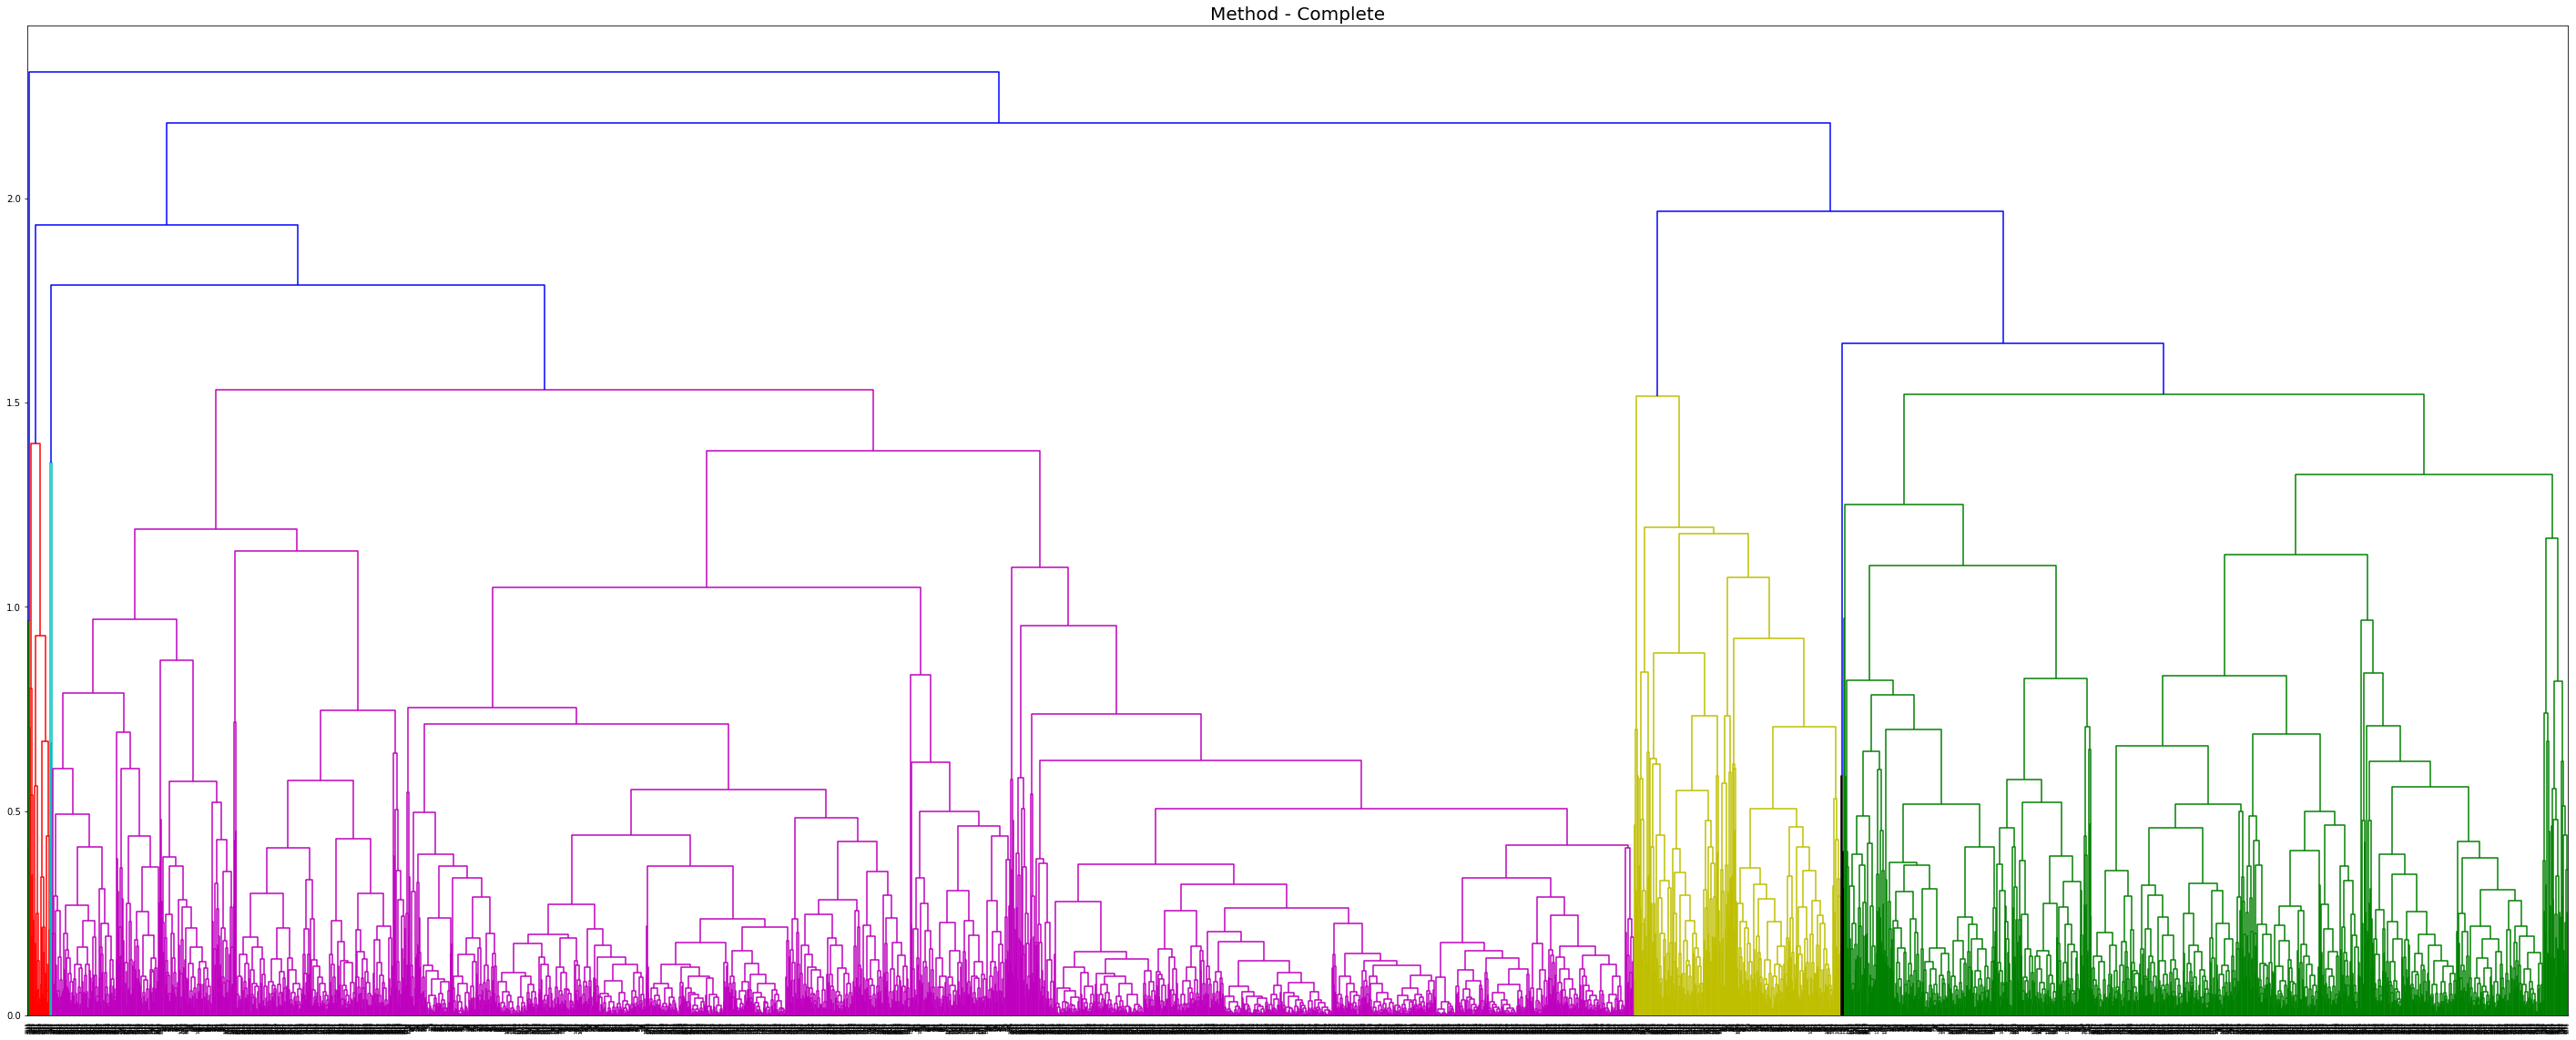

In [155]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete", fontsize=20)
plt.show()

In [226]:
#creating clusters method - Complete
hc_c = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean', linkage= 'complete')

In [227]:
y_hc_c = hc_c.fit_predict(minmax_df)
y_hc_c

array([2, 2, 2, ..., 0, 2, 2])

In [228]:
df3=df1.copy()
df3['h_clusterid'] = y_hc_c
df3

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [229]:
df3.h_clusterid.value_counts()

2    1934
0    1140
3     556
1     325
4      31
5       4
6       4
7       4
Name: h_clusterid, dtype: int64

In [230]:
df3.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000
1,1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,45097.337125,90.706308,1.187177,1.000000,1.000517,3897.718201,6.801448,231.008790,0.675284,3845.414685,0.000000
3,3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000
4,4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000
6,6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000
7,7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


- We can imply that, using Complete method of Heirarchical clustering would be better as it giving us more distributed data in diff clusters.

# **K-Means Clustering**

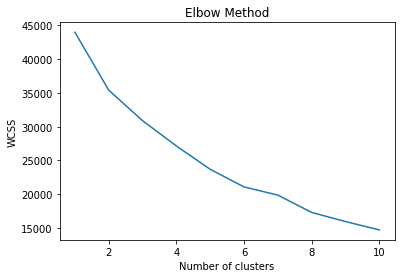

In [231]:
#How to find optimum number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It would be good to choose k values after 8. We will choose k = 8.

In [232]:
from pandas.core.common import random_state
clusters_new = KMeans(8, random_state=32)
clusters_new.fit(std_df)

KMeans(random_state=32)

In [233]:
clusters_new.labels_

array([1, 1, 1, ..., 7, 3, 3], dtype=int32)

In [235]:
df4=df1.copy()
df4['h_clusterid'] = clusters_new.labels_

In [236]:
df4

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,7
4018,64385,0,1,1,1,981,5,0,0,1395,1,7
4019,73597,0,3,1,1,25447,8,0,0,1402,1,7


In [237]:
df4.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,199014.459016,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
1,1,59654.209494,32.939112,1.502580,1.000000,1.001032,6295.554180,8.510836,175.981424,0.532508,5643.721362,0.000000
2,2,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
3,3,34558.725945,32.481100,1.250000,1.000000,1.000000,4391.077320,6.601375,149.811856,0.449313,2105.282646,0.000000
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
6,6,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
7,7,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000


# **DBSCAN**

In [238]:
from sklearn.cluster import DBSCAN

In [239]:
df_d=pd.read_csv('/content/EastWestAirlines.csv')

In [251]:
dbscan = DBSCAN(eps = 1, min_samples=8)
dbscan.fit(std_df)

DBSCAN(eps=1, min_samples=8)

In [252]:
#Noisy points are given by the label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [253]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])

In [254]:
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3993,1
3994,1
3995,1
3996,0


In [255]:
df_d=pd.concat([df1,cl], axis=1)
df_d.head()

,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award,clusters
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,-1.0


In [256]:
df_d['clusters'].value_counts()

 0.0    2295
 1.0    1055
-1.0     637
 2.0      11
Name: clusters, dtype: int64

In [257]:
#clusters by DBSCAN
df_d.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,q_miles,cc1,cc2,cc3,b_miles,b_trans,f_miles12,f_trans12,day_se,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1.0,81907.301109,107.957211,2.171157,1.007924,1.003170,18306.342314,12.036450,477.337559,1.481775,4694.098257,0.396197
1,0.0,67873.577496,158.089755,1.992995,1.017075,1.014011,16402.766637,11.380911,469.306918,1.364273,3819.302539,0.354203
2,1.0,82439.670802,135.699427,2.150763,1.013359,1.014313,18302.604008,11.915076,437.093511,1.354008,4502.467557,0.392176
3,2.0,58414.636364,445.727273,2.090909,1.000000,1.000000,14583.090909,11.818182,578.636364,1.454545,2795.636364,0.363636
